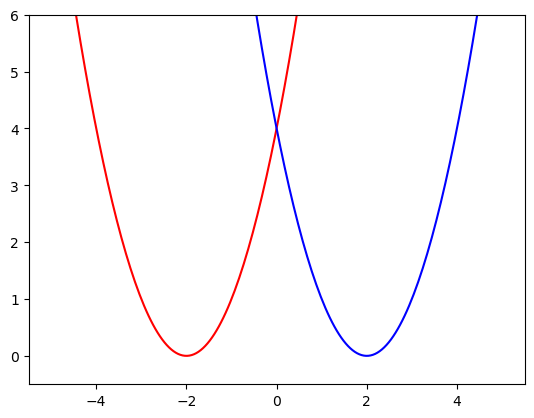

In [2]:
%matplotlib inline
from math import *
import numpy as np
import random
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
np.set_printoptions(precision=3)
def u0(x):
    return (x+2)**2
def u1(x):
    return (x-2)**2
x=np.linspace(-5,5,200)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

In [8]:
def MCpropagator(x0,dx,N,dN,u):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count <N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.0,1.0)
            if rnd < 0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = u(xtrial) - u(xcurrent)
            if deltau < 0.0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count]=xcurrent
        count = count + 1
    return x, count

Number of samples generated:   10000
The distribution of the samples looks like:


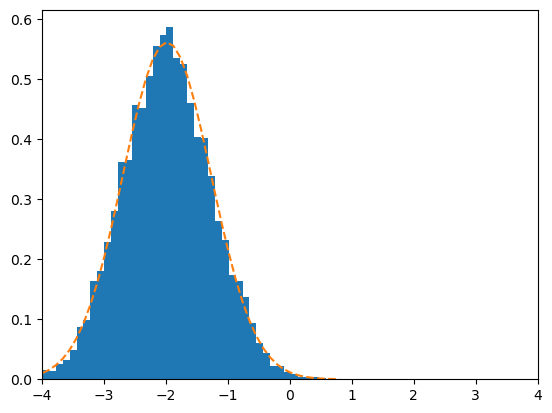

In [9]:
dx=0.01
N = 10000
dN = 1600
x0 = -1.5
x = np.empty(N)
x, count = MCpropagator(x0,dx,N,dN,u0)
print('Number of samples generated:%8d' %count)
print('The distribution of the samples looks like:')
prob, bins, patches = plt.hist(x, bins=50, density=True)
mean = np.mean(x)
variance = np.var(x)
sigma = np.sqrt(variance)
npdf = scipy.stats.norm.pdf(bins,mean,sigma)
plt.plot(bins, npdf, '--')
plt.xlim(-4,4)
plt.show()

In [13]:
##we calculate the free energy difference using defined tp function

def TP(x,u1,u0):
    edu = np.zeros(x.size)
    edu = np.exp(-(u1(x)-u0(x)))
    S = np.mean(edu)
    varS = np.var(edu)/x.size
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA

The distribution of delta U looks like:


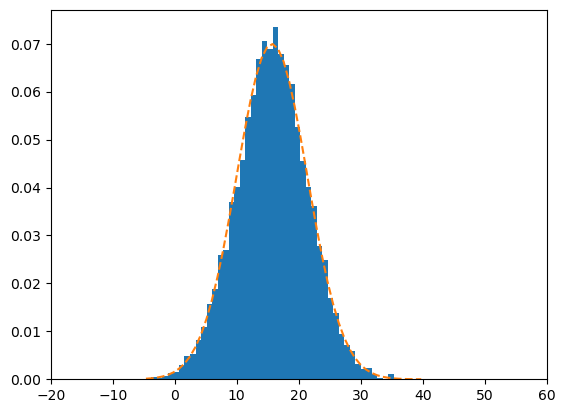

The free energy difference from a direct TP calculation is     3.35 +-  0.35


In [14]:
du=u1(x)-u0(x)
probdu, binsdu, patchesdu = plt.hist(du, bins=50, density=True)
meandu = np.mean(du)
variancedu = np.var(du)

sigmadu = np.sqrt(variancedu)
npdfdu = scipy.stats.norm.pdf(binsdu,meandu,sigmadu)
plt.plot(binsdu, npdfdu, '--')
print('The distribution of delta U looks like:')
plt.xlim(-20,60)
plt.show()

deltaA_direct, varA_direct = TP(x,u1,u0)
print('The free energy difference from a direct TP calculation is %8.2f +- %5.2f' % (deltaA_direct, sqrt(varA_direct)))

introducing strafitied sampling: intermediate states

In [1]:
def ulmbd (lamb, x):
    return (1-lamb)*u0(x)+lamb*u1(x)

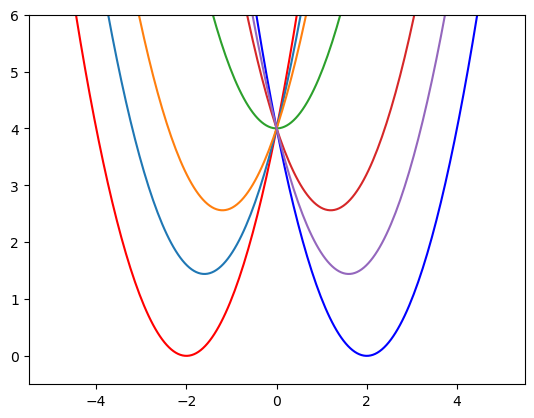

In [5]:
x=np.linspace(-5,5,200)
y0=ulmbd(0.0,x)
y1=ulmbd(0.1,x)
y2=ulmbd(0.2,x)
y5=ulmbd(0.5,x)
y8=ulmbd(0.8,x)
y9=ulmbd(0.9,x)
yN=ulmbd(1.0,x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r')
plt.plot(x,yN,'b')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y8)
plt.plot(x,y9)
plt.show()


In [6]:
def MCpropagator2(x0,dx,N,dN,ulmbd,lamb):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count < N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.,1.)
            if rnd<0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = ulmbd(lamb,xtrial) - ulmbd(lamb,xcurrent)
            if deltau < 0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count] = xcurrent
        count = count + 1
    return x, count

def TP2(x,ulmbd,lmbd1,lmbd2):
    edu=np.zeros(x.size)
    edu = np.exp(-(ulmbd(lmbd2,x)-ulmbd(lmbd1,x)))
    S = np.mean(edu)
    varS = np.var(edu)/x.size
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA


The free energy difference from lambda 0 to lambda 1 is     1.41 +-  0.02
The free energy difference from lambda 1 to lambda 2 is     1.16 +-  0.02
The free energy difference from lambda 2 to lambda 3 is     0.85 +-  0.02
The free energy difference from lambda 3 to lambda 4 is     0.47 +-  0.02
The free energy difference from lambda 4 to lambda 5 is     0.21 +-  0.02
The free energy difference from lambda 5 to lambda 6 is    -0.08 +-  0.02
The free energy difference from lambda 6 to lambda 7 is    -0.47 +-  0.02
The free energy difference from lambda 7 to lambda 8 is    -0.70 +-  0.02
The free energy difference from lambda 8 to lambda 9 is    -1.12 +-  0.02
The free energy difference from lambda 9 to lambda 10 is    -1.37 +-  0.02

The total free energy difference is     0.37 +-  0.06


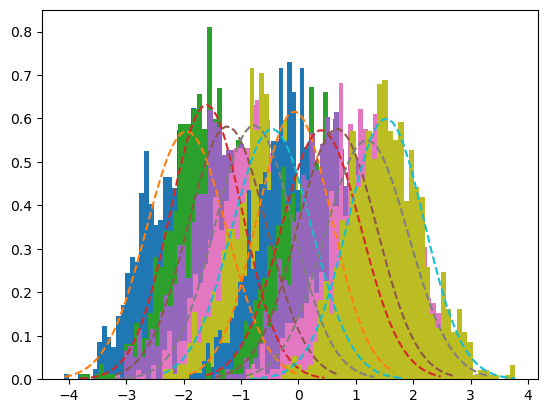

In [10]:
dx = 0.01
dlambda = 0.1
lambs = np.arange(0.0,1.,dlambda)
lambs = np.append(lambs,[1.0])
Ns = N//(len(lambs)-1)
deltaA = np.zeros(len(lambs)-1)
varA = np.zeros(len(lambs)-1)
i = 0
for i in range(len(lambs)-1):
    x0 = -1.5 + 3.0*i*dlambda
    x = np.empty(Ns)
    x, count = MCpropagator2(x0,dx,Ns,dN,ulmbd,lambs[i])
#    print('Number of samples generated:%8d for lambda= %5.2f' %(count,lambs[i]))
    prob, bins, patches = plt.hist(x, bins=50, density=True)
    mean = np.mean(x)
    variance = np.var(x)
    sigma = np.sqrt(variance)
    npdf = scipy.stats.norm.pdf(bins,mean,sigma)
    plt.plot(bins, npdf, '--')
    deltaA[i], varA[i] = TP2(x,ulmbd,lambs[i],lambs[i+1])
    print('The free energy difference from lambda %d to lambda %d is %8.2f +- %5.2f' % (i,i+1,deltaA[i], sqrt(varA[i])))

print('')
print('The total free energy difference is %8.2f +- %5.2f' %(np.sum(deltaA),sqrt(np.sum(varA))))
plt.show()